In [67]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Expore Data

In [85]:
raw_data = pd.read_csv("./data/tech_stocks_2306-2406.csv", index_col=0)
raw_data.index = raw_data.index.map(lambda x: x[:10])
raw_data.head()

,AAPL,AMZN,GOOG,MSFT,NVDA
Date,,,,,
2023-06-26,185.270004,127.330002,119.089996,328.600006,40.632000
2023-06-27,188.059998,129.179993,119.010002,334.570007,41.875999
2023-06-28,189.250000,129.039993,121.080002,335.850006,41.117001
2023-06-29,189.589996,127.900002,120.010002,335.049988,40.821999
2023-06-30,193.970001,130.360001,120.970001,340.540009,42.301998


## Prices

Text(0, 0.5, 'price in $')

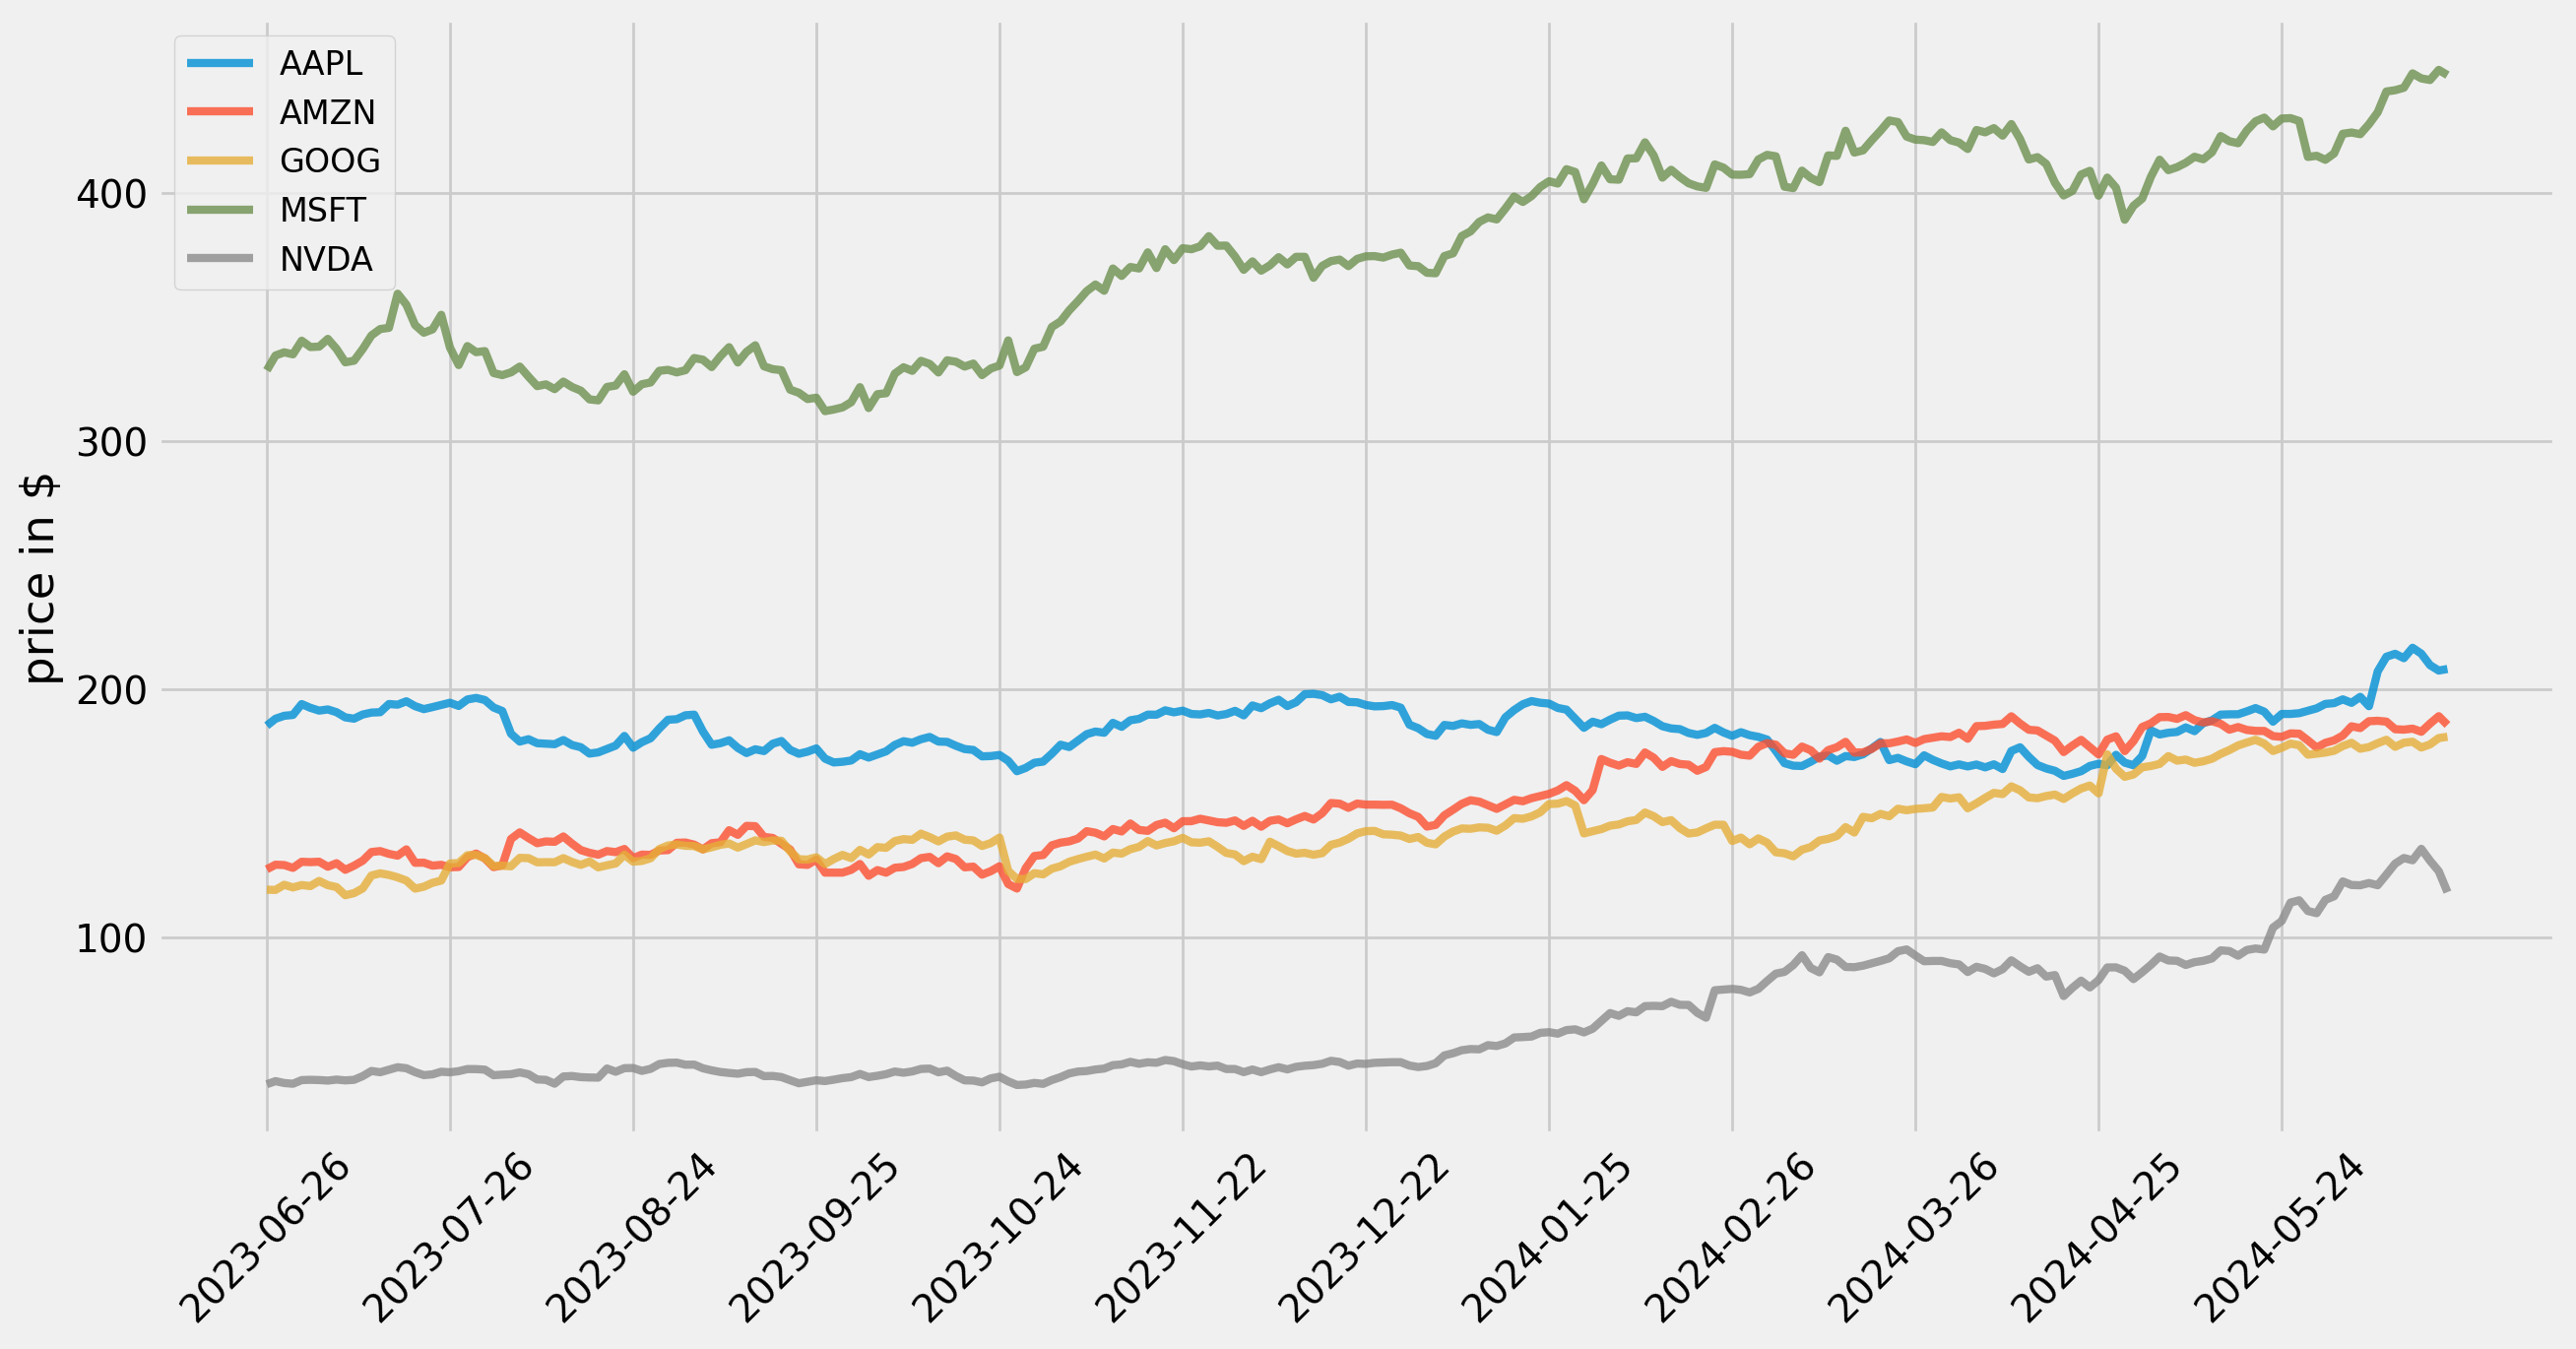

In [89]:
plt.figure(figsize=(14, 7))
for stock in raw_data.columns:
    plt.plot(raw_data.index, raw_data[stock], lw=3, alpha=0.8, label=stock)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(raw_data.index[::21], rotation=45)
plt.ylabel('price in $')

## Returns

Text(0, 0.5, 'daily returns')

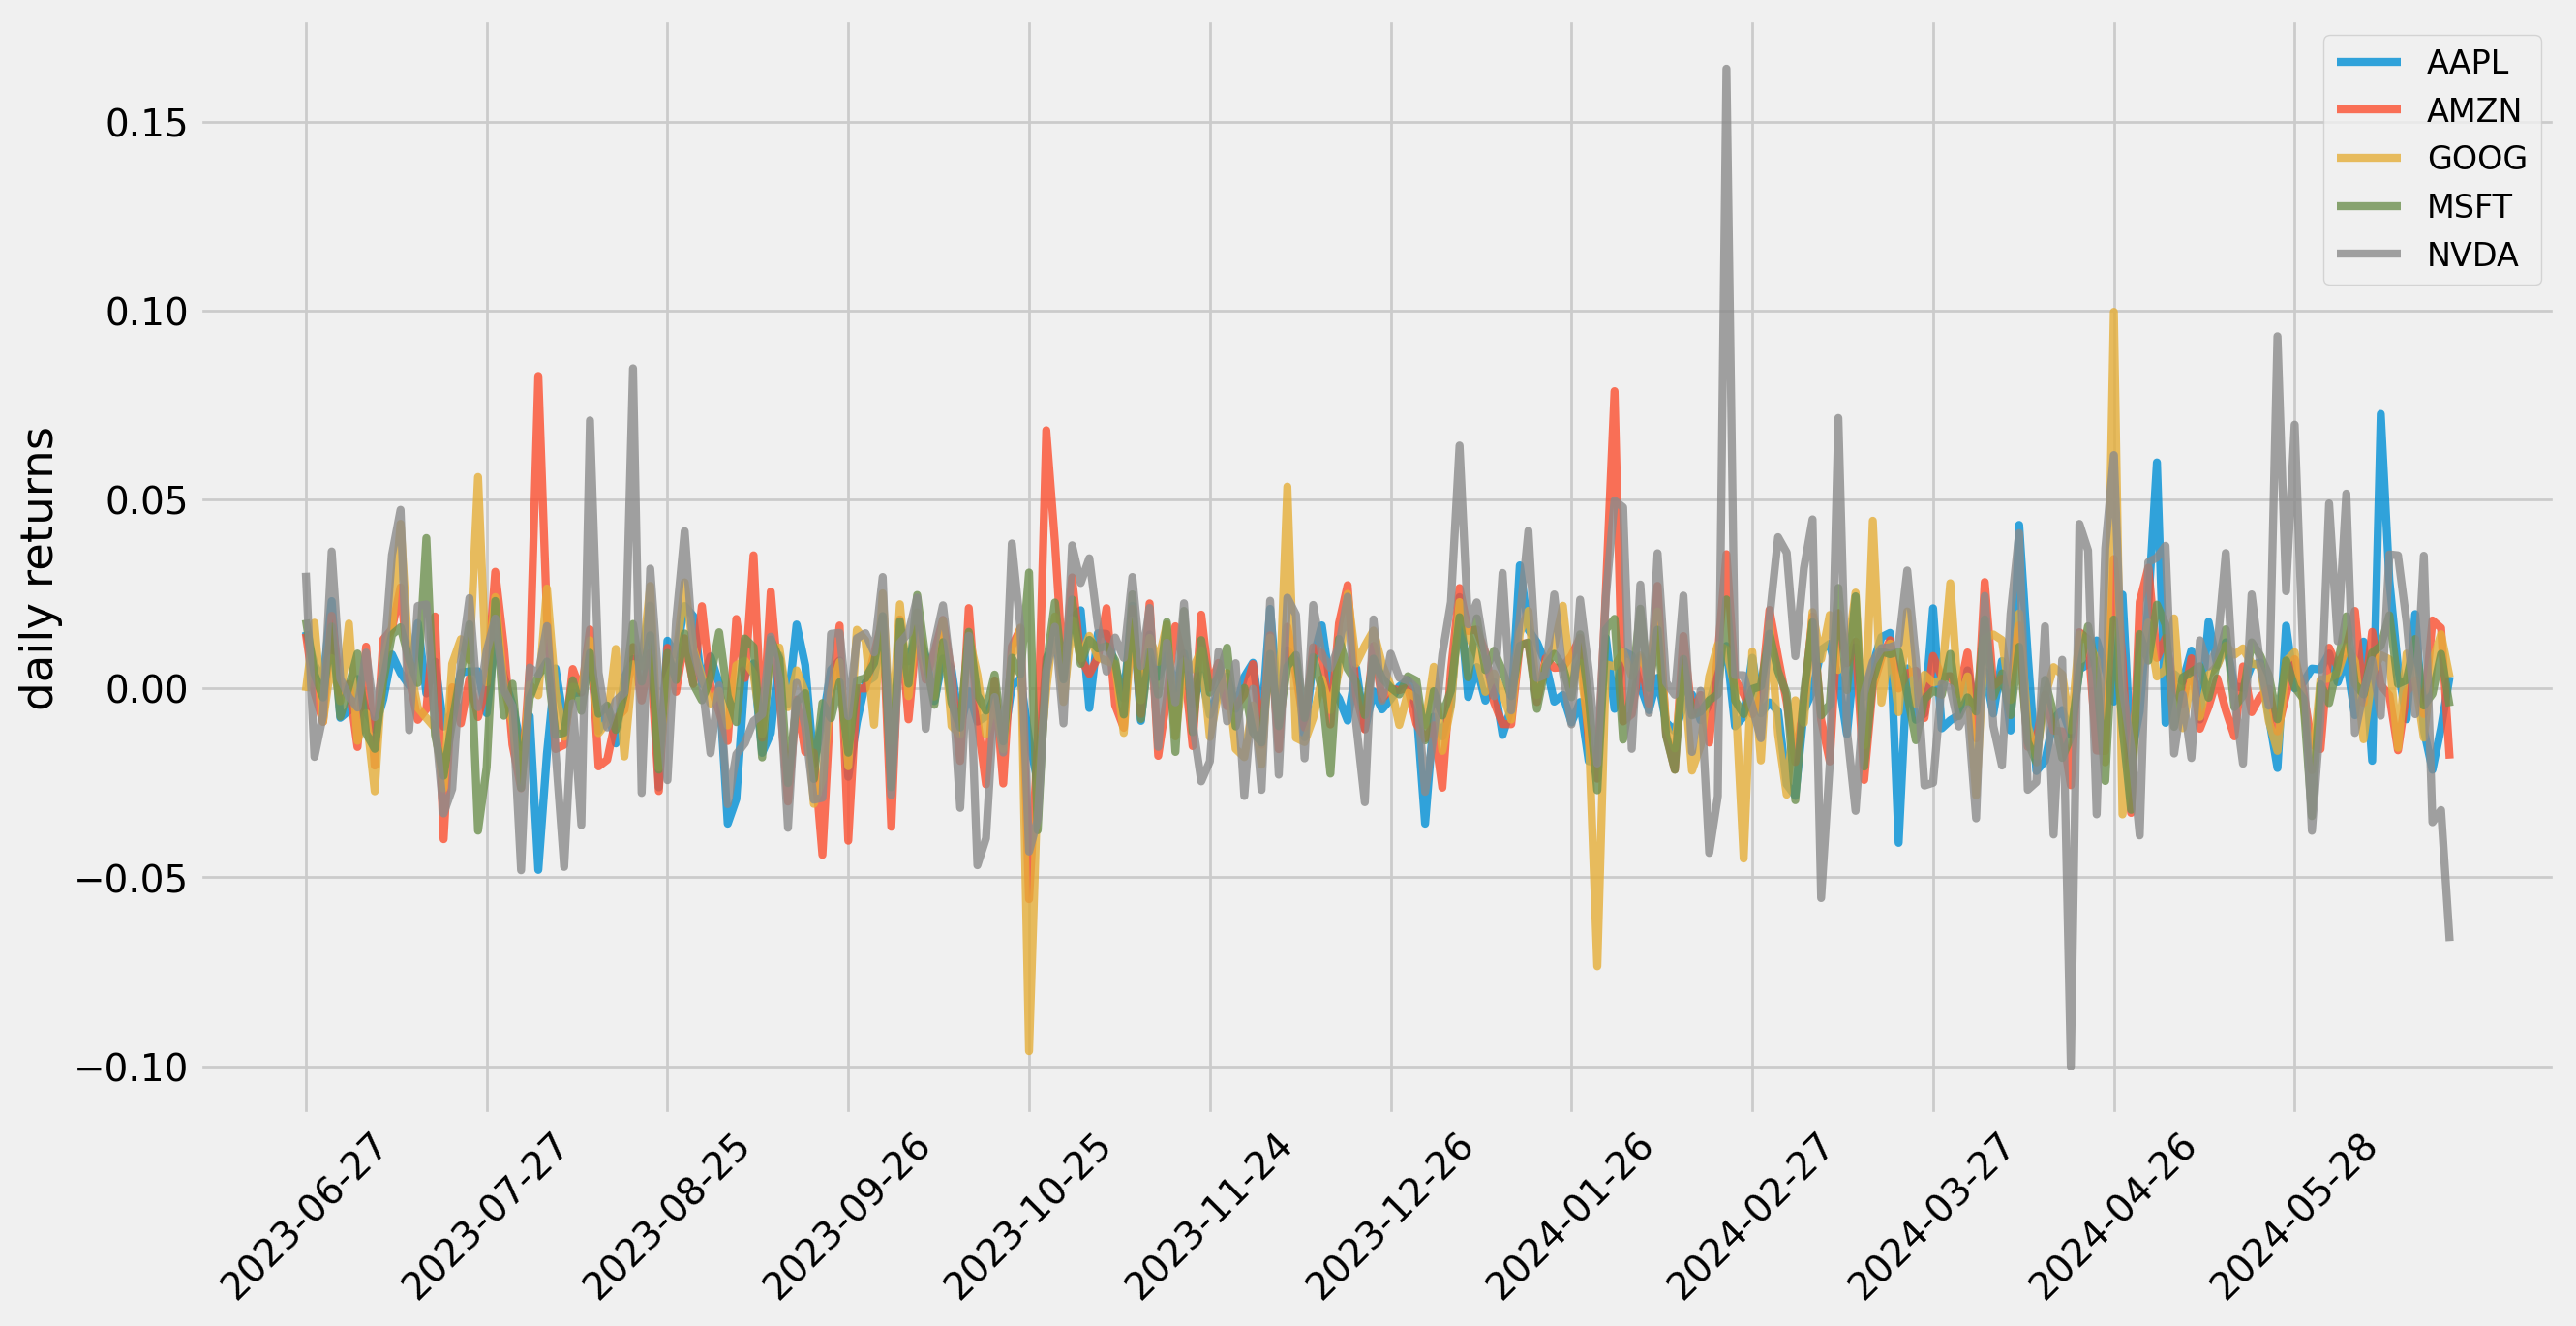

In [90]:
returns = raw_data.pct_change()[1:]
plt.figure(figsize=(14, 7))
for stock in raw_data.columns:
    plt.plot(raw_data.index[1:], returns[stock], lw=3, alpha=0.8, label=stock)
plt.legend(loc='upper right', fontsize=12)
plt.xticks(raw_data.index[1::21], rotation=45)
plt.ylabel('daily returns')

# Find Optimal Portfolio

In [93]:
res = pd.read_csv('result.txt')
res.head()

,AAPL,AMZN,GOOG,MSFT,NVDA,return,volatility,sharp ratio,
0,0.184147,0.225778,0.086367,0.330416,0.173292,0.473516,0.201897,2.129380,
1,0.079599,0.196498,0.050320,0.498439,0.175144,0.487998,0.207003,2.146818,
2,0.117707,0.169718,0.271296,0.258559,0.182720,0.512833,0.209051,2.244582,
3,0.405305,0.126644,0.128082,0.335257,0.004712,0.285737,0.173736,1.393705,
4,0.378993,0.029756,0.133750,0.080512,0.376989,0.597607,0.239787,2.310412,


In [115]:
num_assets = 5
weights = res.iloc[:,:num_assets]
rets = res.iloc[:, num_assets]
vol = res.iloc[:, num_assets+1]
spratio = res.iloc[:, num_assets+2]

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation
AAPL     0.007987
 AMZN    0.047408
 GOOG    0.306076
 MSFT    0.009799
 NVDA     0.62873
Name: 5355, dtype: object
Annualised Return: 0.9
Annualised Volatility: 0.33
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation
AAPL     0.332652
 AMZN    0.072922
 GOOG    0.135506
 MSFT    0.446487
 NVDA    0.012432
Name: 4961, dtype: object
Annualised Return: 0.3
Annualised Volatility: 0.17
--------------------------------------------------------------------------------
Maximum Return Portfolio Allocation
AAPL     0.086139
 AMZN    0.049269
 GOOG       0.077
 MSFT    0.064099
 NVDA    0.723494
Name: 2631, dtype: object
Annualised Return: 0.94
Annualised Volatility: 0.35


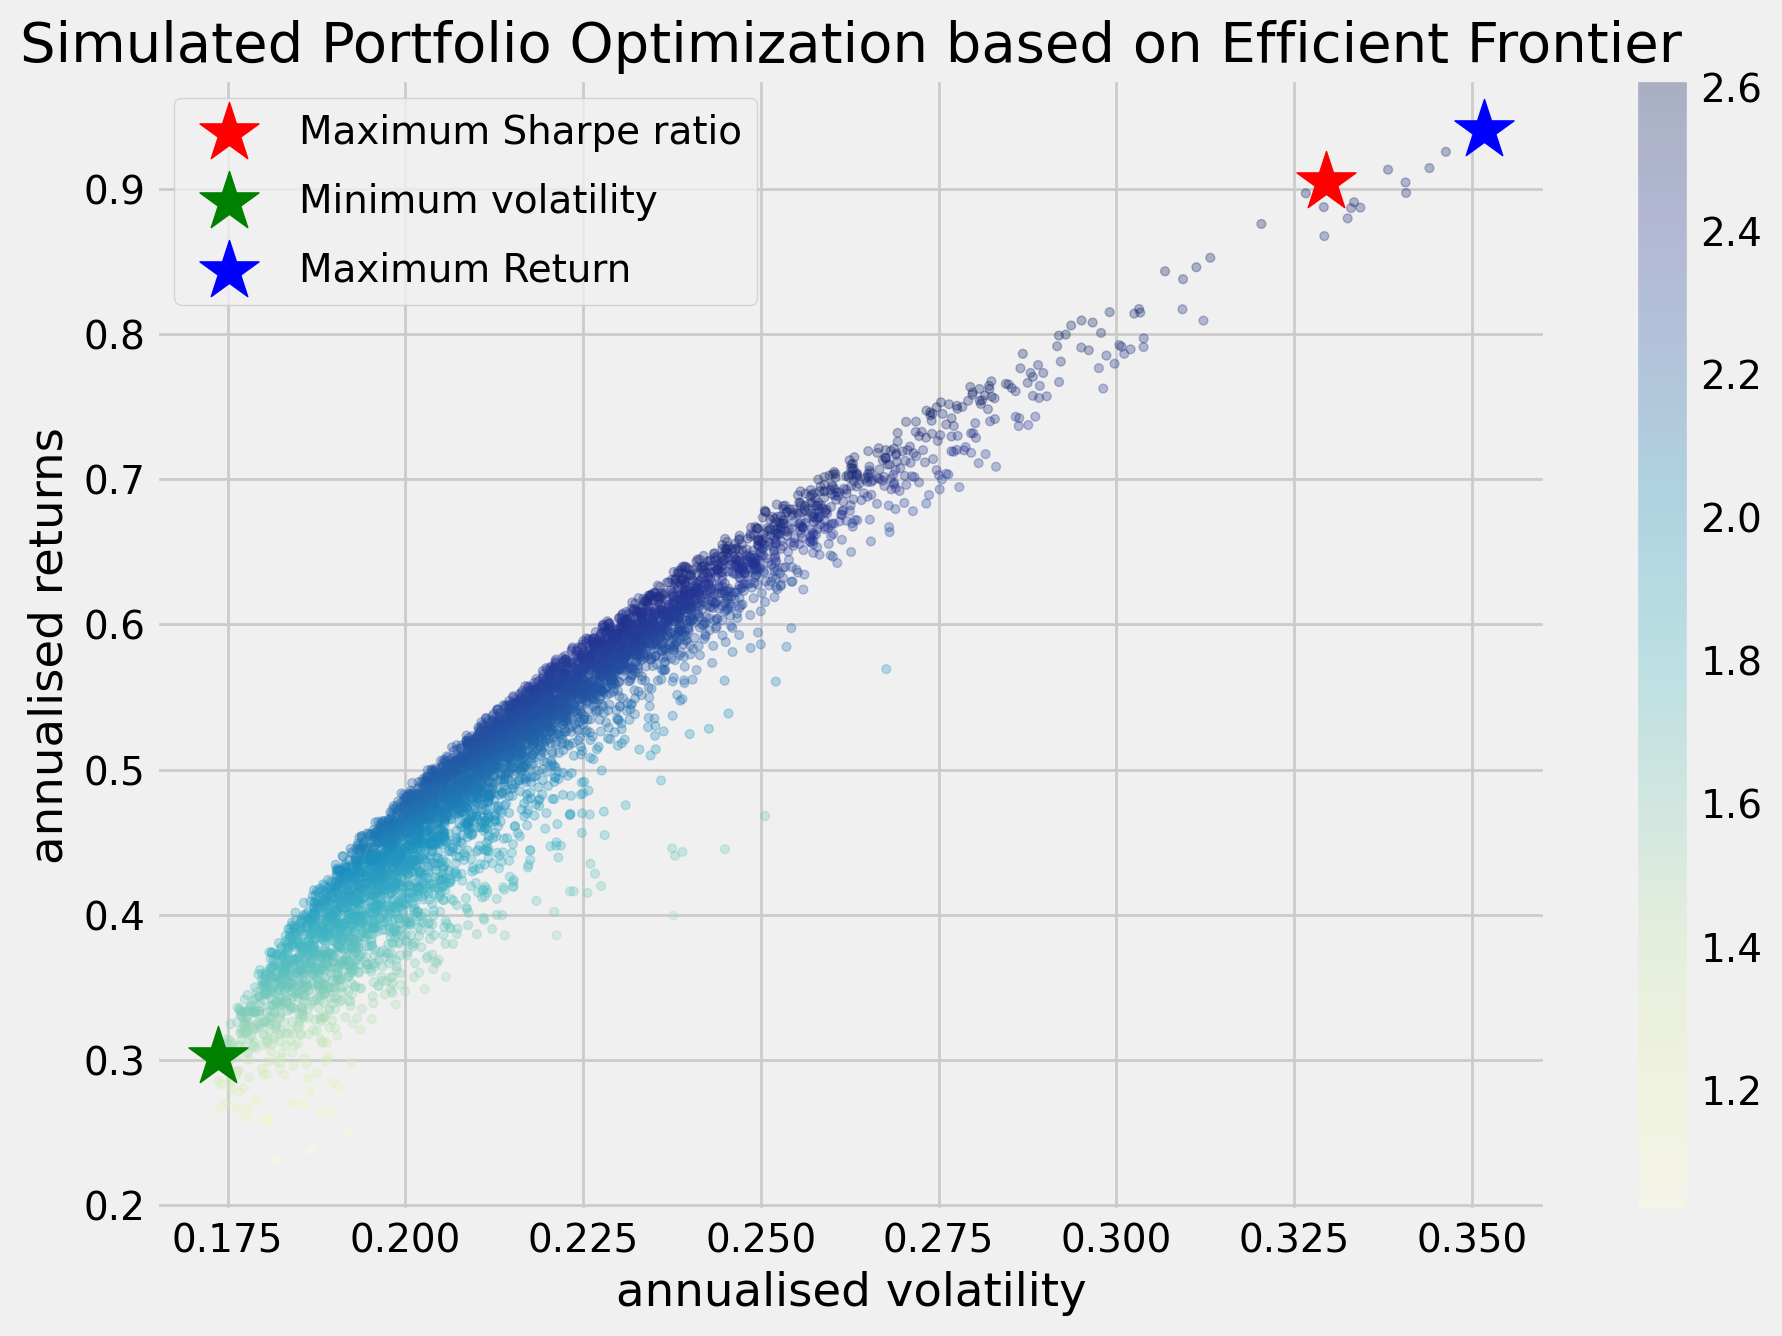

In [117]:
max_sharpe_idx = spratio.argmax()
sdp, rp = vol[max_sharpe_idx], rets[max_sharpe_idx]

max_return_idx = rets.argmax()
std_max_ret, rp_max_ret = vol[max_return_idx], rets[max_return_idx]

min_vol_idx = vol.argmin()
sdp_min, rp_min = vol[min_vol_idx], rets[min_vol_idx]

print("-"*80)
print("Maximum Sharpe Ratio Portfolio Allocation")
print(res.iloc[max_sharpe_idx, :num_assets])
print("Annualised Return:", round(rp,2))
print("Annualised Volatility:", round(sdp,2))

print("-"*80)
print("Minimum Volatility Portfolio Allocation")
print(res.iloc[min_vol_idx, :num_assets])
print("Annualised Return:", round(rp_min,2))
print("Annualised Volatility:", round(sdp_min,2))

print("-"*80)
print("Maximum Return Portfolio Allocation")
print(res.iloc[max_return_idx, :num_assets])
print("Annualised Return:", round(rp_max_ret,2))
print("Annualised Volatility:", round(std_max_ret,2))

plt.figure(figsize=(10, 7))
plt.scatter(vol, rets, marker='o',c=spratio, cmap='YlGnBu', s=10, alpha=0.3)
plt.colorbar()

plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
plt.scatter(std_max_ret,rp_max_ret,marker='*',color='b',s=500, label='Maximum Return')

plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
plt.xlabel('annualised volatility')
plt.ylabel('annualised returns')
plt.legend(labelspacing=0.8)